In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import seaborn as sns
import logging

FORMAT = '%(asctime)s %(message)s'

logging.basicConfig(level='INFO', format=FORMAT, datefmt='%d-%b-%y %H:%M:%S')
sns.set_context("talk")

In [3]:
from src.load_data import load_data

epoch_key = ('jaq', 1, 2) # animal, day, epoch

data = load_data(epoch_key)

11-Aug-20 15:42:14 Loading position information and linearizing...
11-Aug-20 15:43:58 Loading multiunits...


In [4]:
cv_classifier_clusterless_results = xr.open_mfdataset(
    f"{epoch_key[0]}_{epoch_key[1]:02d}_{epoch_key[2]:02d}_cv_classifier_clusterless_results.nc")

cv_classifier_clusterless_results

<xarray.Dataset>
Dimensions:            (position: 72, state: 2, time: 1022605)
Coordinates:
  * position           (position) float64 1.191 3.573 5.955 ... 267.6 269.9
  * state              (state) object 'random_walk' 'uniform'
  * time               (time) float64 2.611e+03 2.611e+03 ... 4.656e+03
Data variables:
    likelihood         (time, state, position) float64 dask.array<chunksize=(1022605, 2, 72), meta=np.ndarray>
    causal_posterior   (time, state, position) float64 dask.array<chunksize=(1022605, 2, 72), meta=np.ndarray>
    acausal_posterior  (time, state, position) float64 dask.array<chunksize=(1022605, 2, 72), meta=np.ndarray>

In [5]:
from replay_trajectory_classification import ClusterlessClassifier

cv_classifier = ClusterlessClassifier.load_model(f"{epoch_key[0]}_{epoch_key[1]:02d}_{epoch_key[2]:02d}_cv_classifier.pkl")
cv_classifier

ClusterlessClassifier(continuous_transition_types=[['random_walk', 'uniform'],
                                                   ['uniform', 'uniform']],
                      model_kwargs={'bandwidth': array([20., 20., 20., 20.,  8.])},
                      movement_var=6.0,
                      occupancy_kwargs={'bandwidth': array([20., 20., 20., 20.,  8.])},
                      occupancy_model=<class 'replay_trajectory_classification.misc.NumbaKDE'>,
                      place_bin_size=2.5, replay_speed=1)

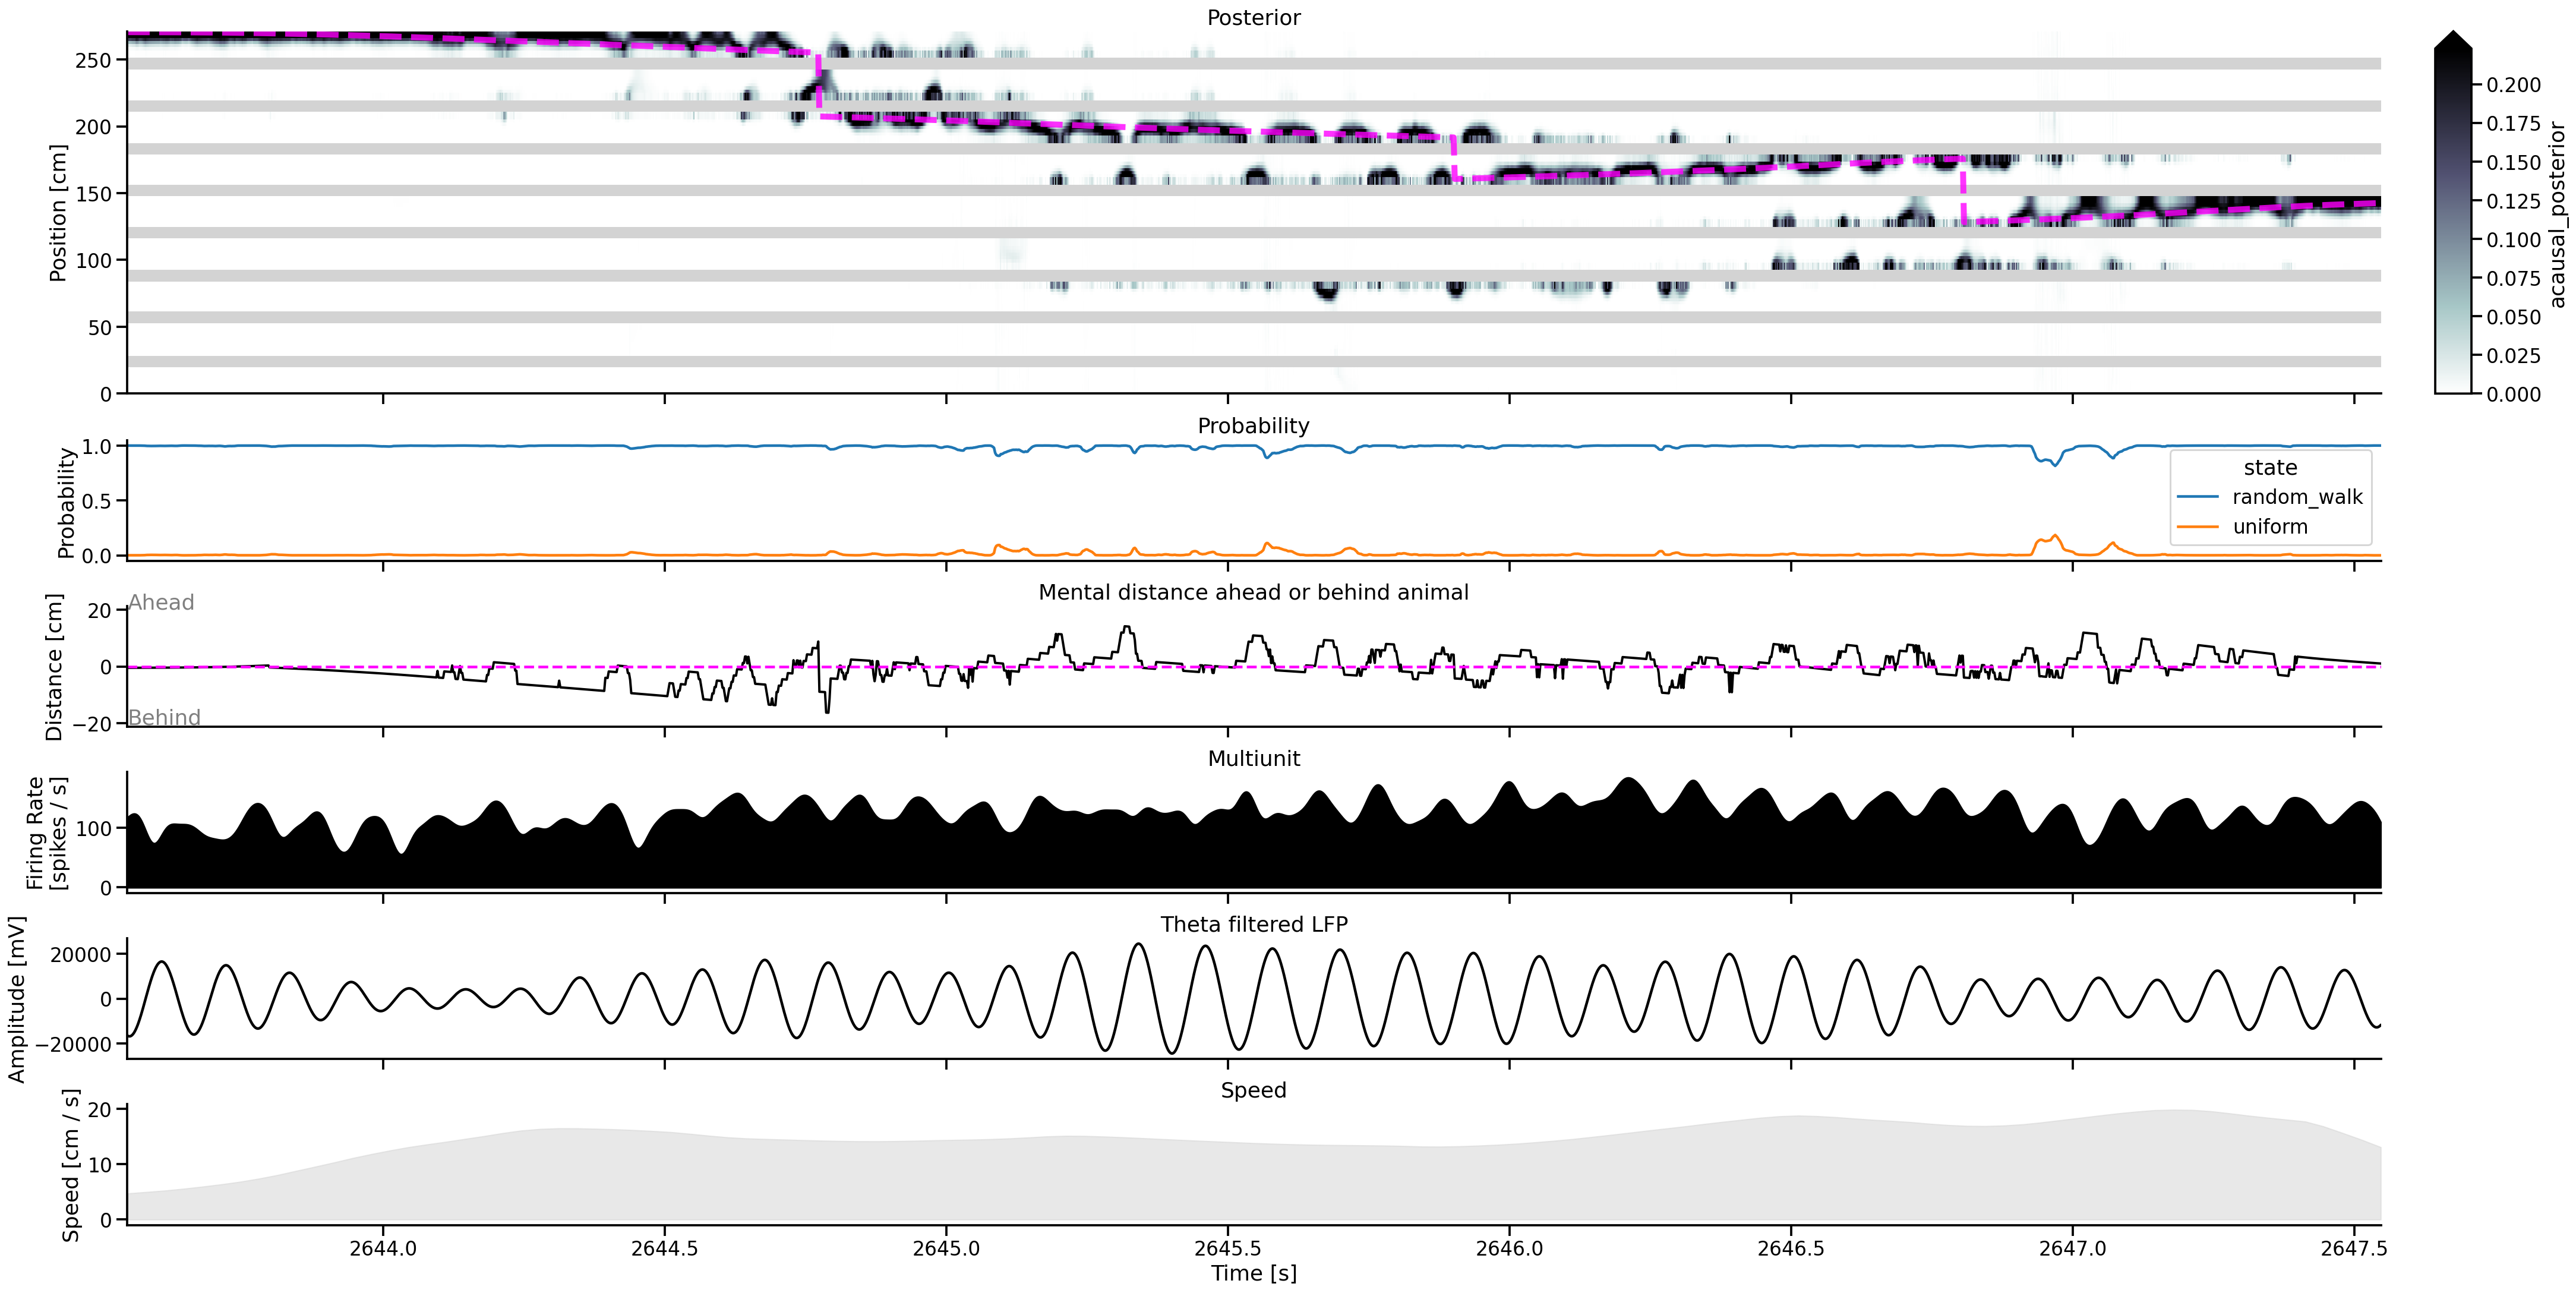

In [6]:
from src.visualization import plot_classifier_time_slice

time = cv_classifier_clusterless_results.time.values
time_slice = slice(time[16500], time[18500])

plot_classifier_time_slice(
    time_slice,
    cv_classifier,
    cv_classifier_clusterless_results,
    data,
    posterior_type="acausal_posterior",
    figsize=(30, 15),
)

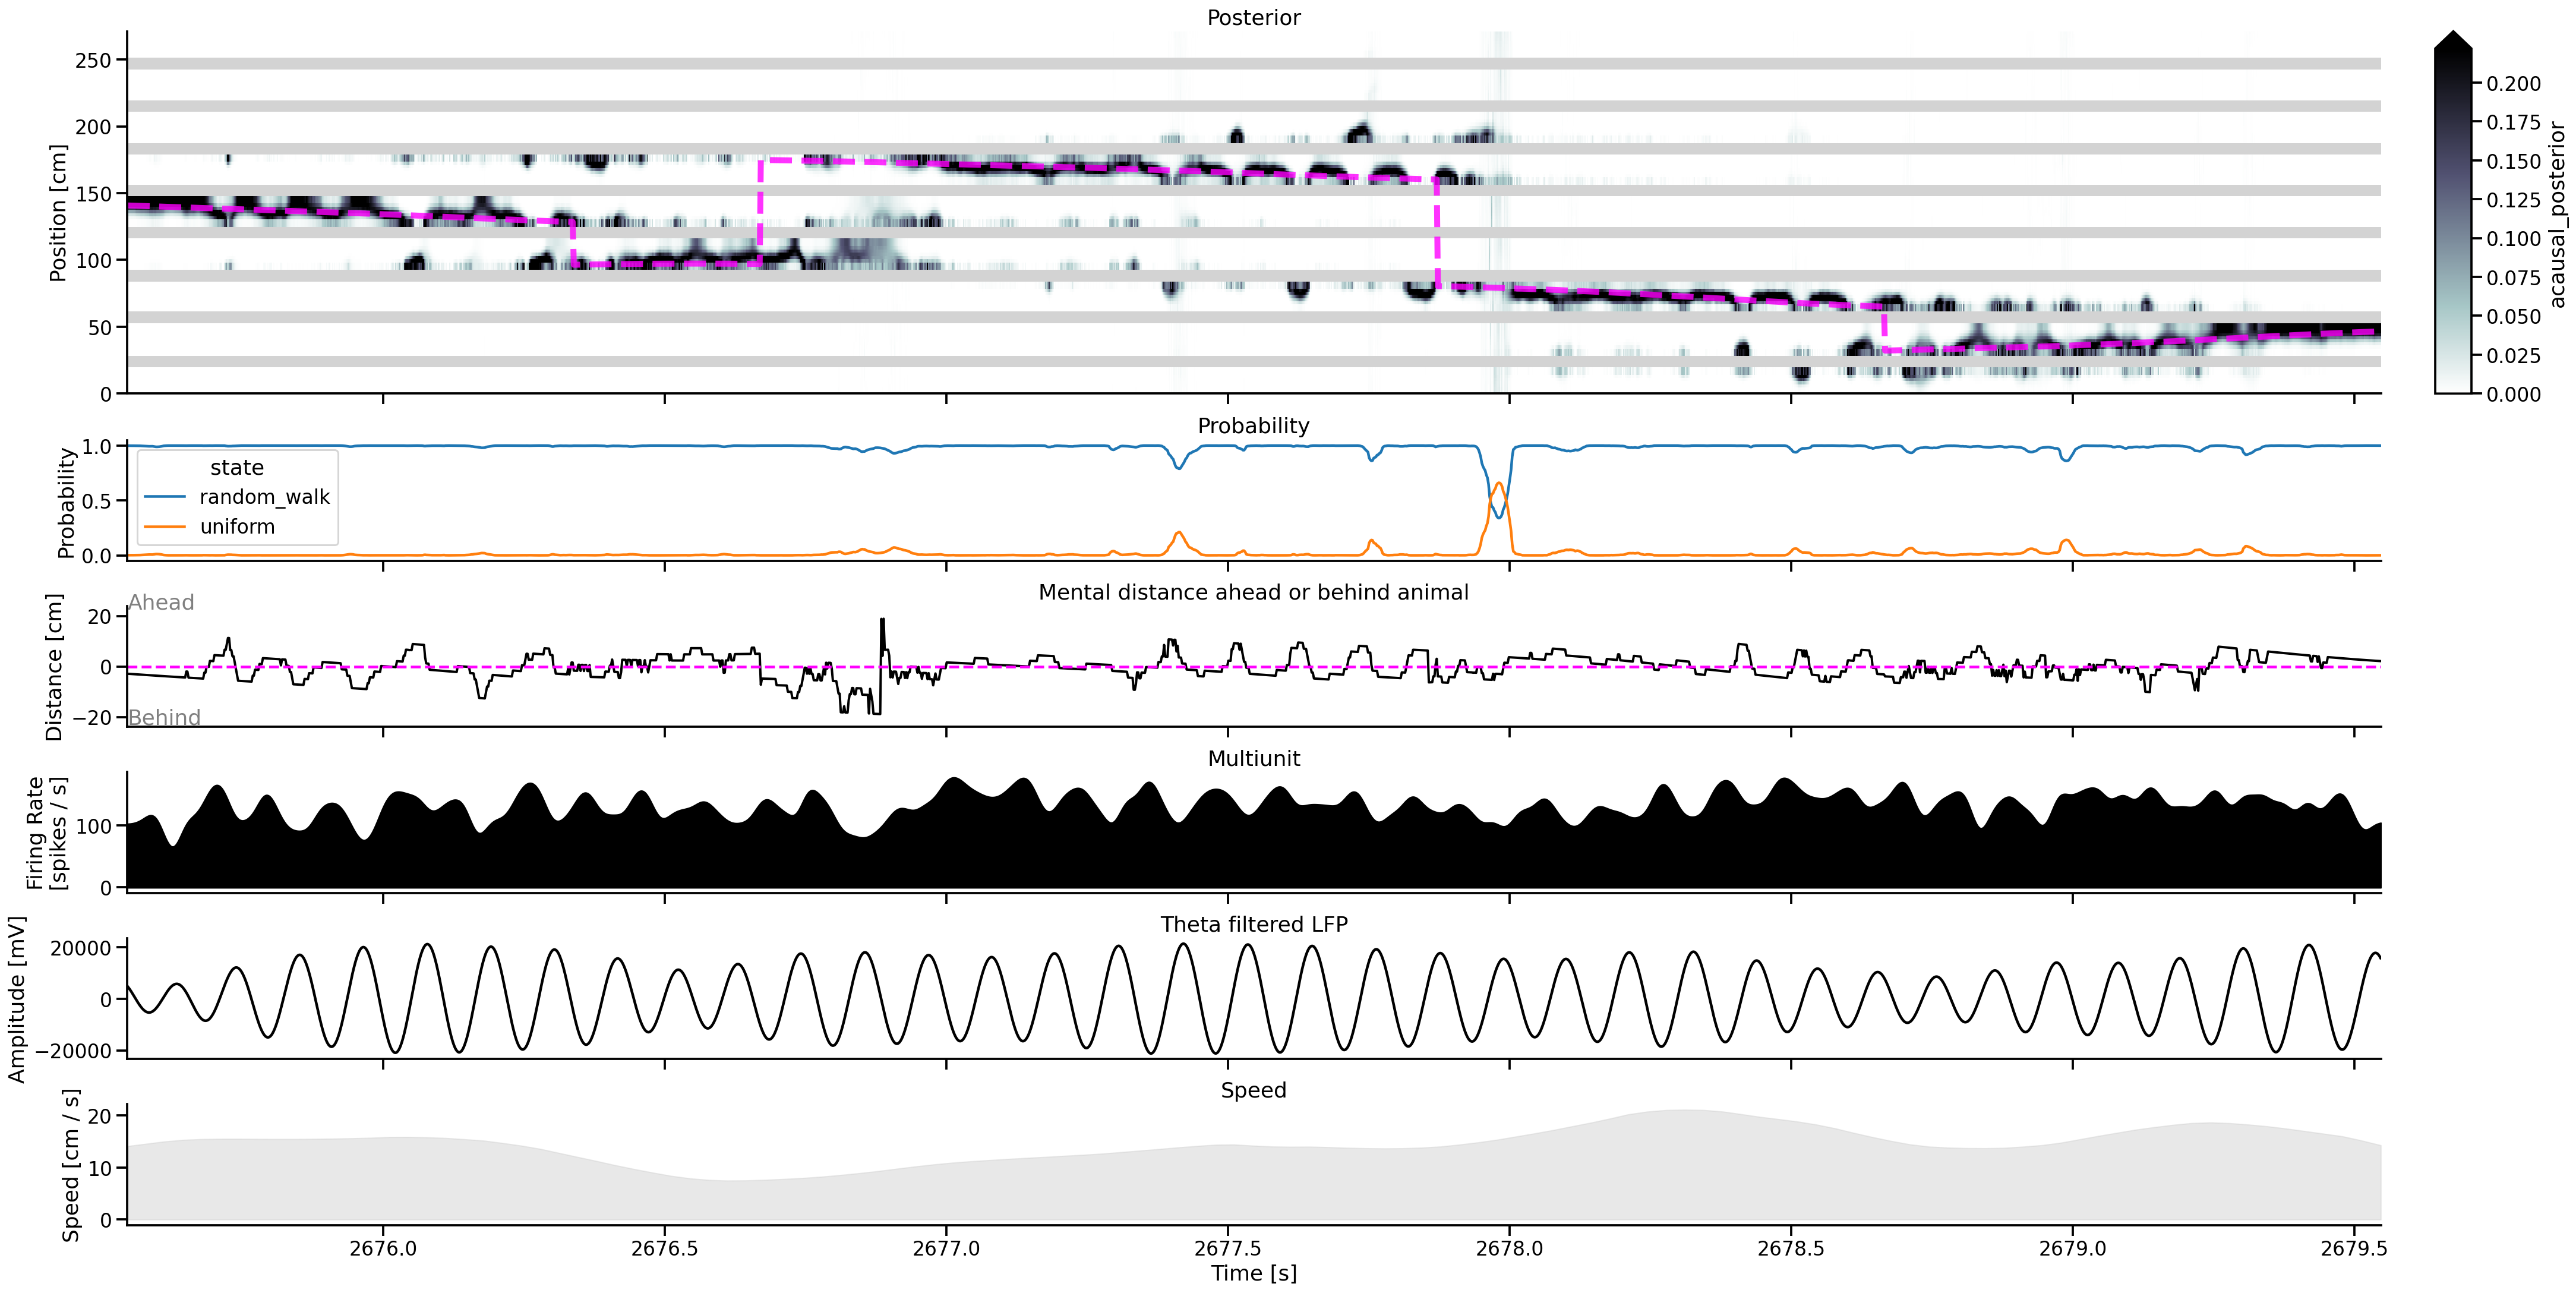

In [7]:
from src.visualization import plot_classifier_time_slice

time = cv_classifier_clusterless_results.time.values
time_slice = slice(time[32500], time[34500])

plot_classifier_time_slice(
    time_slice,
    cv_classifier,
    cv_classifier_clusterless_results,
    data,
    posterior_type="acausal_posterior",
    figsize=(30, 15),
)

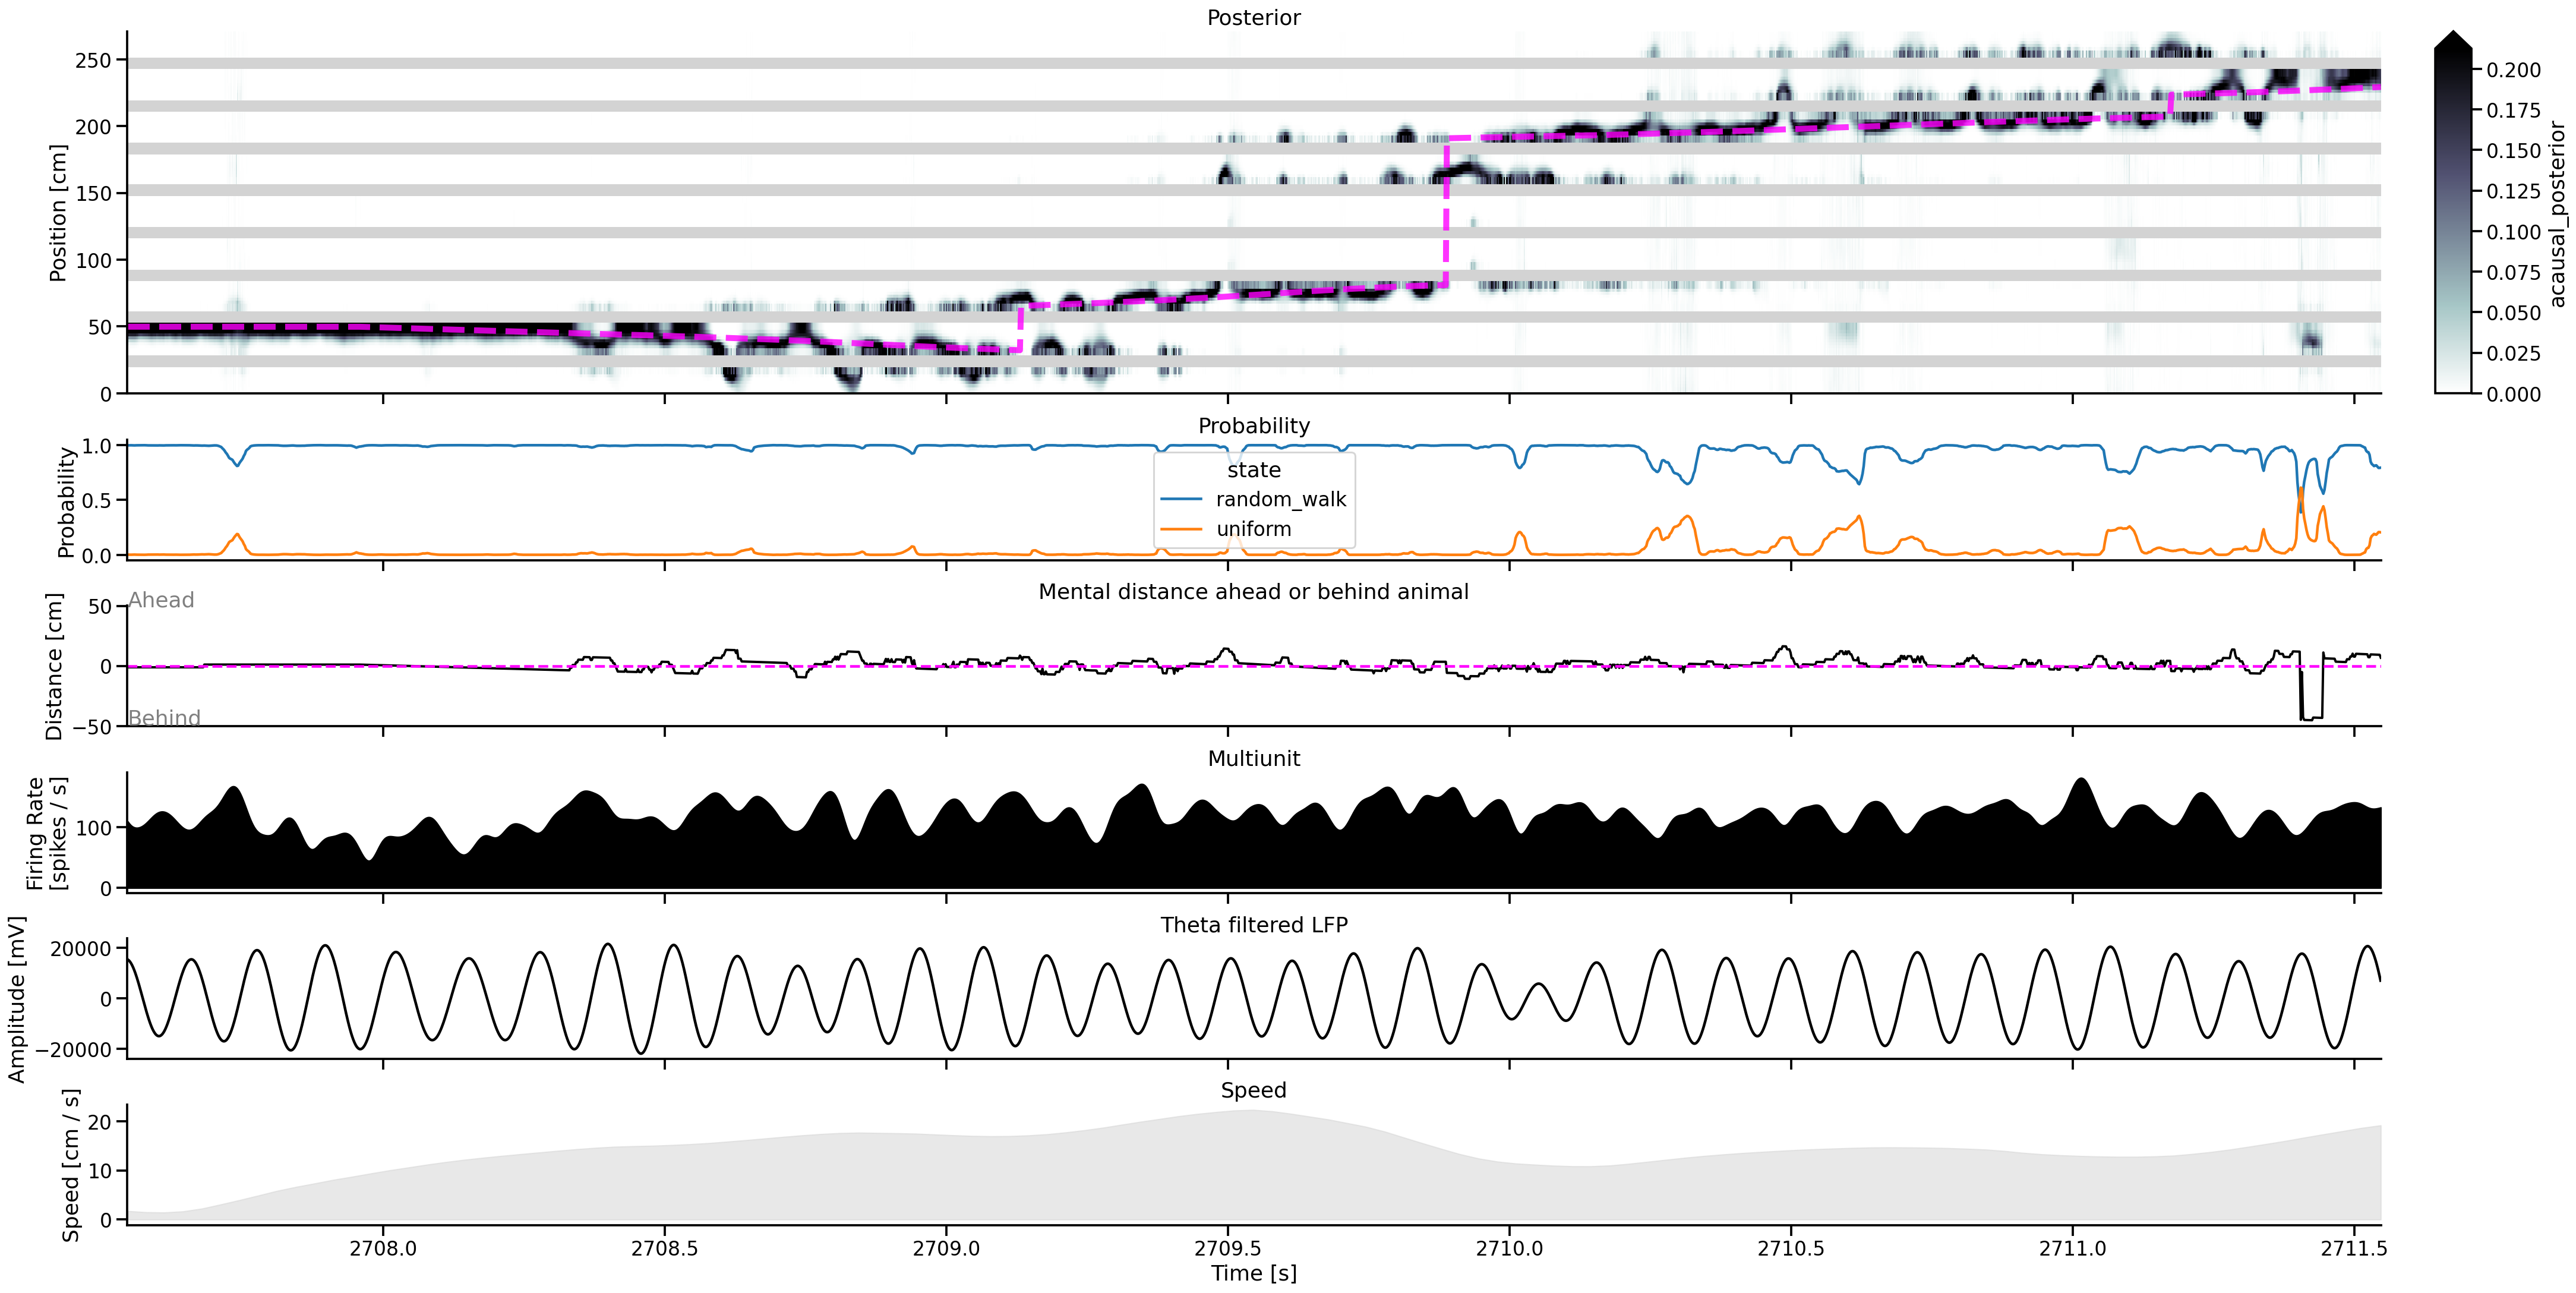

In [8]:
from src.visualization import plot_classifier_time_slice

time = cv_classifier_clusterless_results.time.values
time_slice = slice(time[48500], time[50500])

plot_classifier_time_slice(
    time_slice,
    cv_classifier,
    cv_classifier_clusterless_results,
    data,
    posterior_type="acausal_posterior",
    figsize=(30, 15),
)

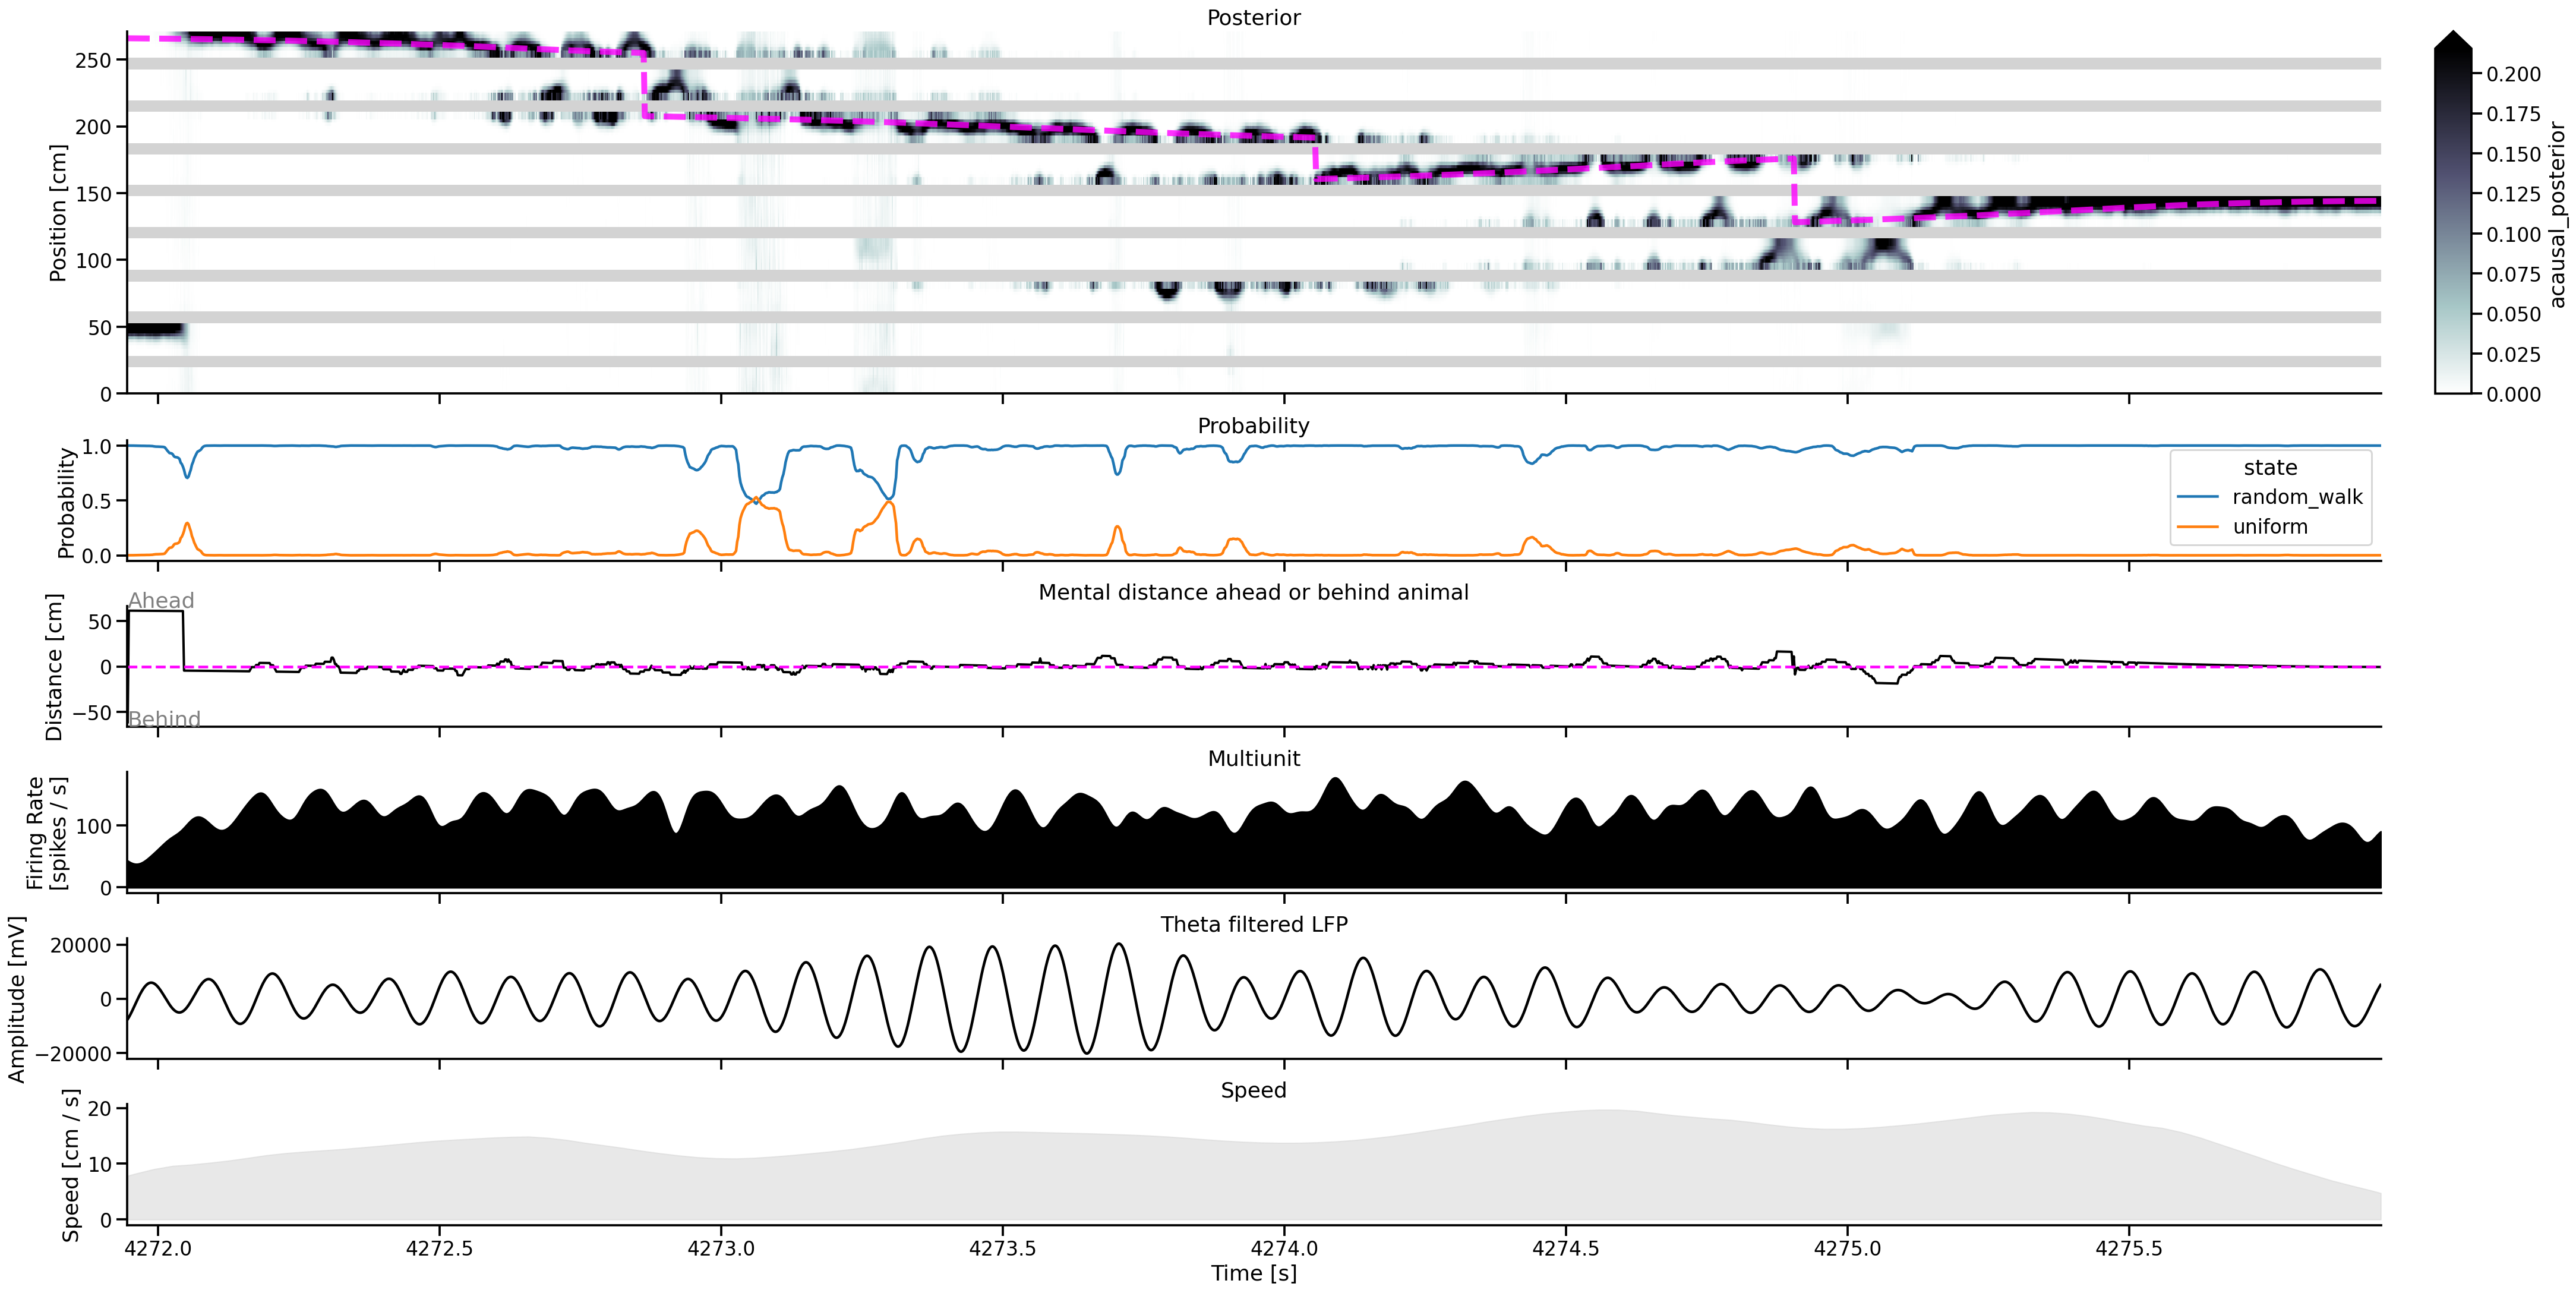

In [9]:
from src.visualization import plot_classifier_time_slice

time = cv_classifier_clusterless_results.time.values
time_slice = slice(time[830700], time[832700])

plot_classifier_time_slice(
    time_slice,
    cv_classifier,
    cv_classifier_clusterless_results,
    data,
    posterior_type="acausal_posterior",
    figsize=(30, 15),
)

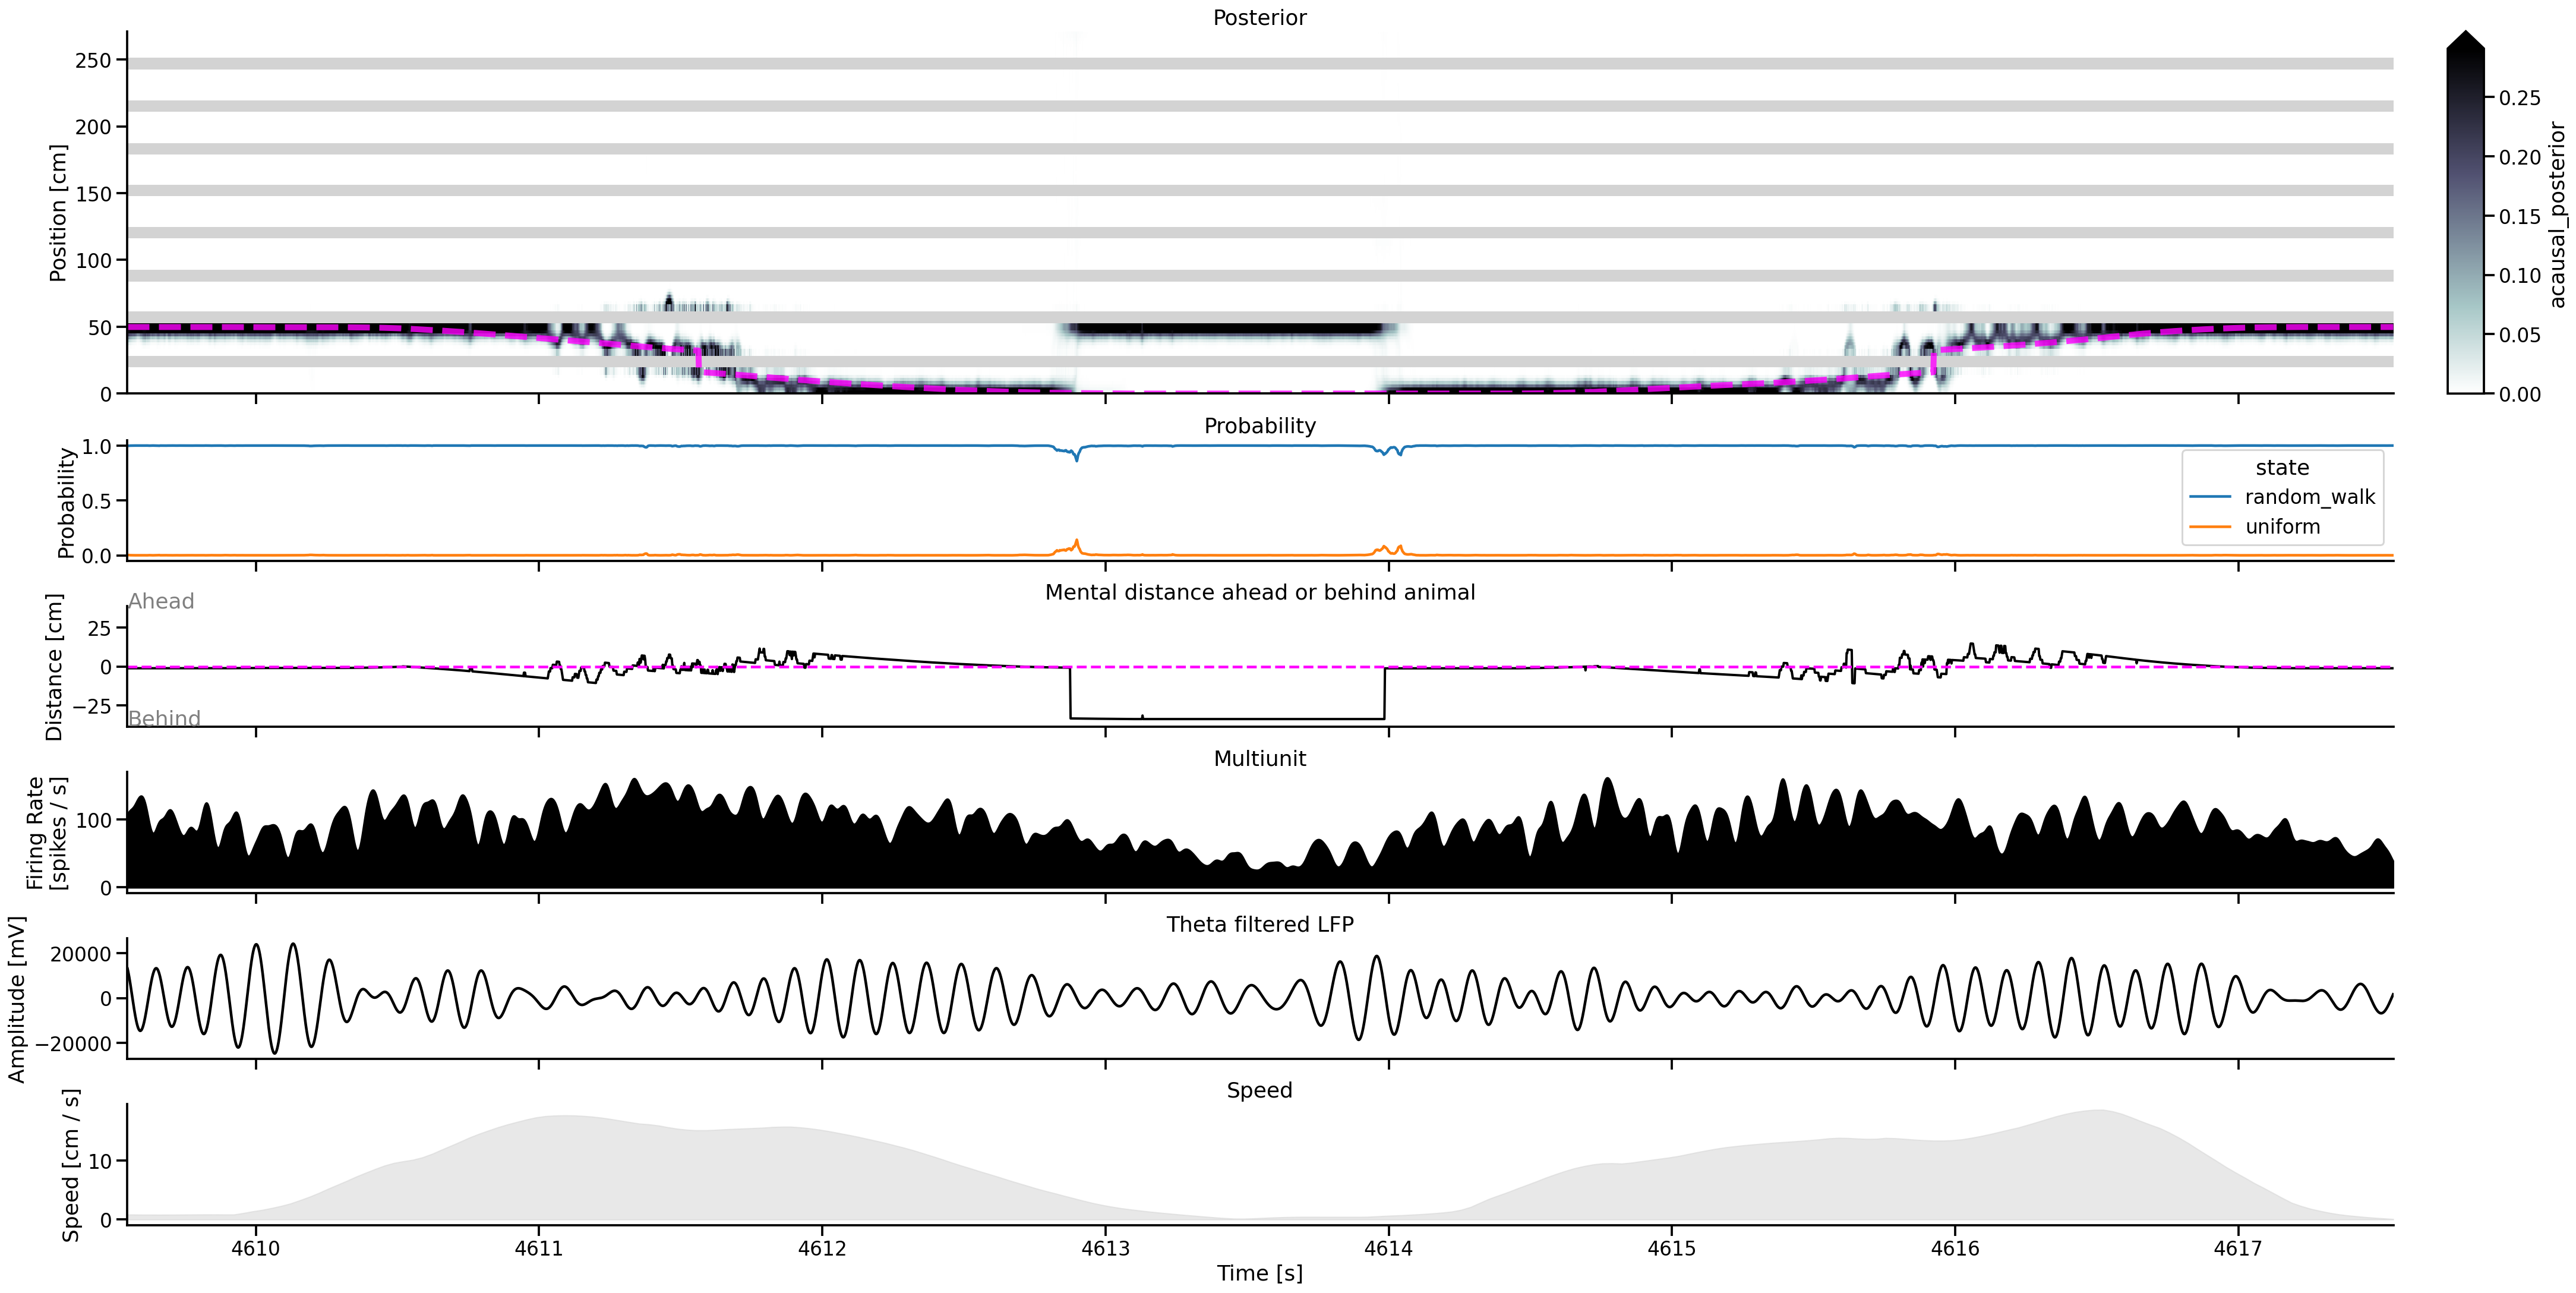

In [10]:
from src.visualization import plot_classifier_time_slice

time = cv_classifier_clusterless_results.time.values
time_slice = slice(time[999500], time[1003500])

plot_classifier_time_slice(
    time_slice,
    cv_classifier,
    cv_classifier_clusterless_results,
    data,
    posterior_type="acausal_posterior",
    figsize=(30, 15),
)

08-Aug-20 20:57:29 Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
08-Aug-20 20:57:29 MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 504x720 -pix_fmt rgba -r 125.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -metadata artist=Me -y test-theta_sweep1.mp4
08-Aug-20 21:07:11 Done


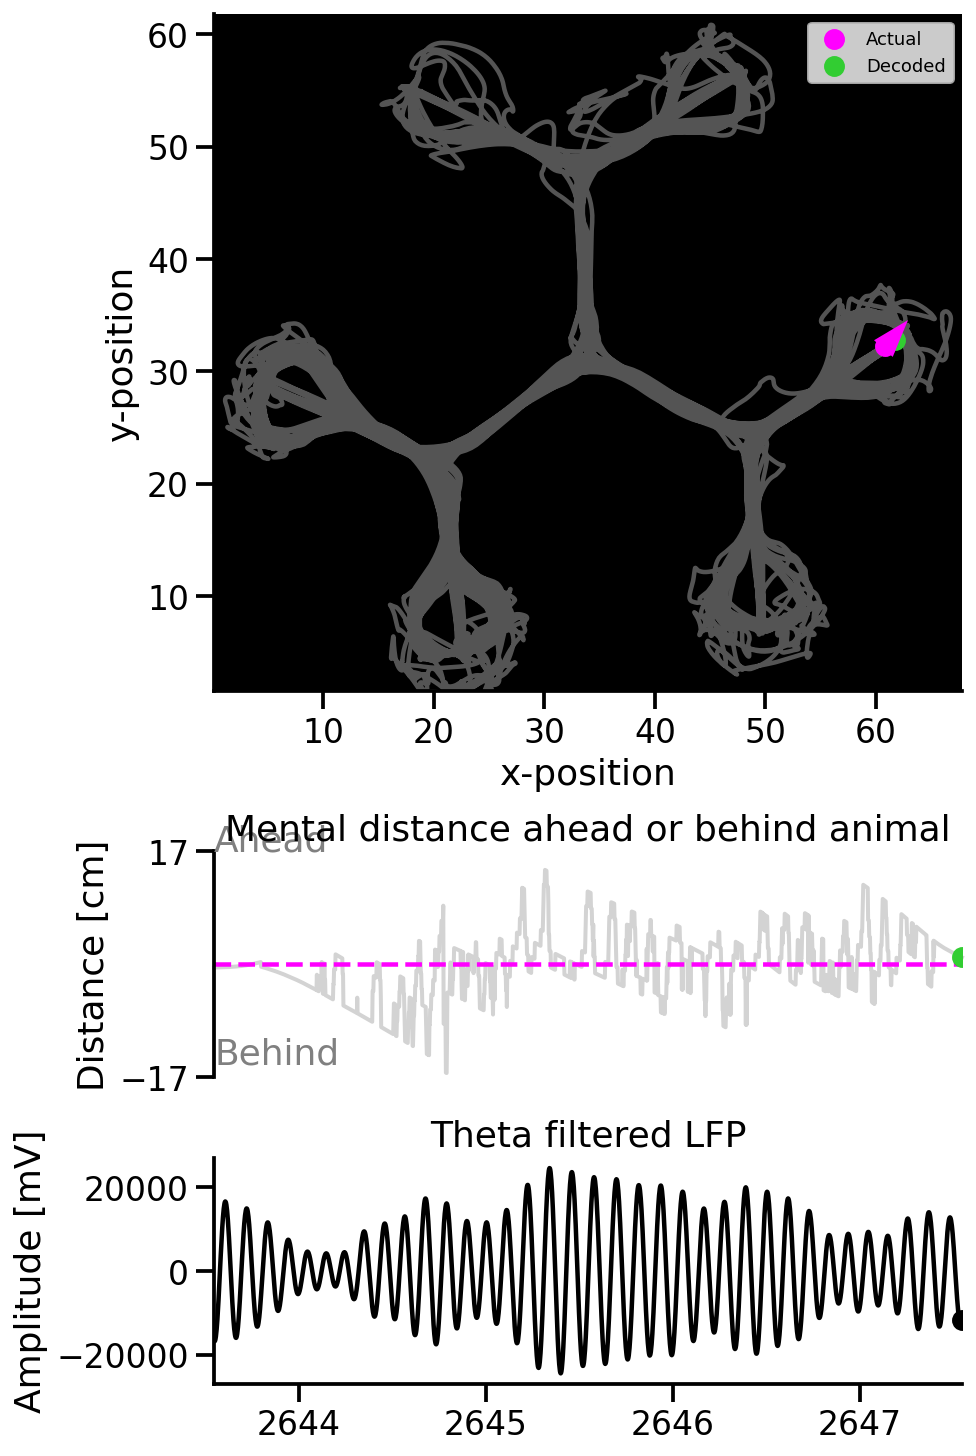

In [86]:
from src.visualization import plot_2D_position_with_color_time, make_movie
from replay_trajectory_classification.core import get_graph_1D_2D_relationships, linear_position_to_2D_projection
from loren_frank_data_processing.track_segment_classification import get_track_segments_from_graph, project_points_to_segment
from src.parameters import SAMPLING_FREQUENCY


frame_rate = SAMPLING_FREQUENCY / 4
time = cv_classifier_clusterless_results.time.values
time_slice = slice(time[16500], time[18500])

# 16 seconds
fig, movie = make_movie(
    time_slice,
    cv_classifier,
    cv_classifier_clusterless_results,
    data,
    frame_rate=frame_rate,
    movie_name="test-theta_sweep1.mp4")
logging.info('Done')

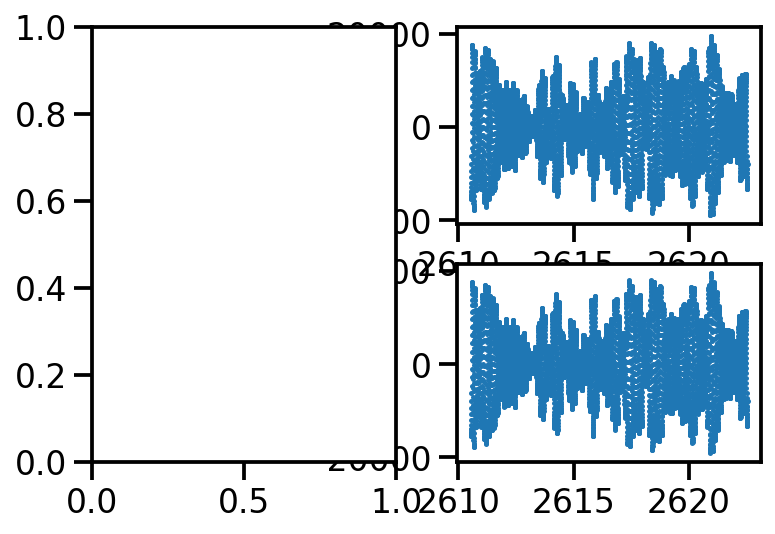

In [115]:

fig, axes = plt.subplots(2, 2)
gs = axes[0, 0].get_gridspec()
# remove the underlying axes
for ax in axes[:, 0]:
    ax.remove()
axbig = fig.add_subplot(gs[:, 0])

axes[0, 1].scatter(theta.iloc[:6000].index / np.timedelta64(1, 's'), theta.iloc[:6000].bandpassed_lfp, s=1)
axes[1, 1].scatter(theta.iloc[:6000].index / np.timedelta64(1, 's'), theta.iloc[:6000].bandpassed_lfp, s=1)

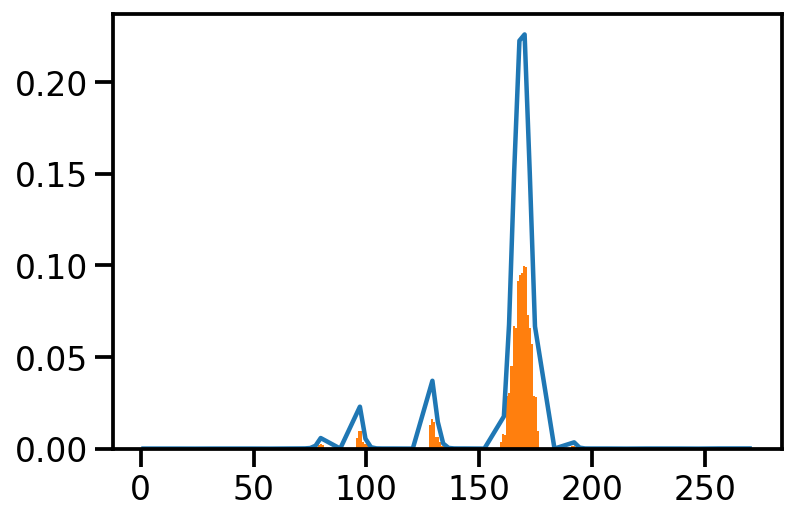

In [218]:
from trajectory_analysis_tools import sample_posterior
posterior = cv_classifier_clusterless_results.sel(time=time_slice)["acausal_posterior"].sum("state")
ind = 1500
sampled_posterior = sample_posterior(posterior.values[ind], cv_classifier.place_bin_edges_.squeeze(), n_samples=int(1E5))

plt.plot(posterior.position, posterior.values[ind])
plt.hist(sampled_posterior, density=True, bins=300);

In [13]:
from trajectory_analysis_tools import sample_posterior
posterior = cv_classifier_clusterless_results.sel(time=time_slice)["acausal_posterior"].sum("state")
sampled_posterior = sample_posterior(posterior, cv_classifier.place_bin_edges_, n_samples=int(1E3))

# Need to simplfy ahead/behind algorithm so that it uses linear position instead of the 2D projected position

In [ ]:
sampled_posterior